# **Exploring Higher Education Enrollment Trends: Data Analysis and Modeling**

## Project Overview:

Welcome to the exploration of Higher Education Enrollment Trends, a comprehensive endeavor aimed at deciphering the factors influencing student participation and course preferences within our local University. This project encompasses a range of tasks, from data analysis and visualization to predictive modeling. We'll undertake a step-by-step journey to extract meaningful insights and develop predictive models that inform strategic decisions.

## Tasks:

### Task 1: Data Understanding and Preprocessing

For each column in the dataset:
a. We will assess whether the values match the predefined descriptions.
b. Identify the number of missing values present.
c. Detail the steps taken to align values with the provided descriptions if discrepancies were found.

### Task 2: Distribution of Enrollment Counts

We will delve into the distribution of enrollment counts and present it through a visualization, offering an intuitive understanding of the enrollment patterns.

### Task 3: Visualization of Course Types

We will create a visualization showcasing the distribution of course types and leverage it to:
a. Identify the type of course with the highest frequency of observations.
b. Evaluate whether the observations are balanced across different course types.

### Task 4: Relationship between Course Type and Enrollment

We will analyze the relationship between course type and enrollment counts, using an illustrative visualization to portray this connection.

### Task 5: Predictive Modeling - Type of Machine Learning Problem

We'll determine the nature of the predictive task for estimating student enrollments. In this case, it involves predicting a numerical value, which corresponds to a regression problem.

### Task 6: Baseline Model for Enrollment Prediction

We will develop and fit a baseline model to predict student enrollments using the provided data. The code implementing this baseline model will be included.

### Task 7: Comparison Model for Enrollment Prediction

We will go a step further and create a comparison model for enrollment prediction, employing a different approach. The code for this comparison model will also be provided.

### Task 8: Model Selection Rationale

An explanation will be offered for the selection of the baseline and comparison models, outlining the reasoning behind our choices.

### Task 9: Model Performance Comparison

We will compare the performance of the baseline and comparison models using suitable evaluation methods. The code for this performance evaluation will be shared.

### Task 10: Model Performance Analysis

Based on the performance comparison, we will elucidate which model outperforms the other and provide reasoning for the observed results.

Through these tasks, we aim to unravel the intricate landscape of higher education enrollment trends, offering valuable insights and predictive capabilities that empower our University to make informed decisions and foster a more enriching learning experience. Stay tuned for a data-driven journey that illuminates the path forward.

 
## Importing Packages

In [68]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px



# Libraries for data preparation and model building
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF
import xgboost as xgb
import catboost as cb
from catboost import CatBoostClassifier
from sklearn.linear_model import HuberRegressor, TheilSenRegressor
from sklearn.model_selection import GridSearchCV




# enhanced stats functions
from scipy import stats
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42
import warnings
warnings.filterwarnings('ignore')

## Loading the Data

In [69]:
df = pd.read_csv('university_enrollment_2306.csv')
df.head()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,None,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science


## **Exploratory** Data Analysis

## Task 1
### Data Understanding and Preprocessing

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   int64  
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1850 non-null   object 
 5   post_score        1665 non-null   float64
 6   pre_requirement   1761 non-null   object 
 7   department        1850 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 115.8+ KB


There are four numerical columns and also four object columns in the dataset. However, the pre_score column is in object data type which is supposed to be be in numerical data type

In [71]:
df.describe(include='all')

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
count,1850.000000,1850,1850.000000,1850.000000,1850,1665.000000,1761,1850
unique,NaN,2,NaN,NaN,1594,NaN,3,5
top,NaN,online,NaN,NaN,-,NaN,None,Technology
freq,NaN,1375,NaN,NaN,130,NaN,802,719
mean,925.500000,NaN,2016.423784,231.565405,NaN,75.204805,NaN,NaN
std,534.193317,NaN,3.448278,36.987029,NaN,8.511981,NaN,NaN
min,1.000000,NaN,2011.000000,154.000000,NaN,51.000000,NaN,NaN
25%,463.250000,NaN,2013.000000,185.000000,NaN,69.000000,NaN,NaN
50%,925.500000,NaN,2016.000000,251.000000,NaN,75.000000,NaN,NaN
75%,1387.750000,NaN,2019.000000,261.000000,NaN,81.000000,NaN,NaN


In [72]:
df.duplicated().sum()

0

There isn't any redundant entry across the rows in the dataset

In [73]:
df.isna().sum()

course_id             0
course_type           0
year                  0
enrollment_count      0
pre_score             0
post_score          185
pre_requirement      89
department            0
dtype: int64

All except two columns has missing or null entries. The first column is post_score which has 186 missing entries. Pre_requirement column also has 89 missing values. Some data processing is needed to be done to ensure the data is clean

In [74]:
df['pre_score'] = df['pre_score'].replace("-", 0)
df['post_score'] = df['post_score'].fillna(0)
df['pre_score'] = df['pre_score'].astype('float')
df['pre_score'] = df['pre_score'].fillna(0)
df['pre_requirement'] = df['pre_requirement'].fillna('None')


The pre_score column has some characters iin it, which was replaced with zero. It was then converted into numeric data type, together with post_score column they were both filled with zero where there is missing value. Pre_requirement column however, was filled with 'None' where there is missing entry as it is of object data type.

In [75]:
for column in df.columns:
    unique_entries = df[column].unique()
    print(f"Unique entries in column '{column}':")
    print(unique_entries)
    print("=" * 50)

Unique entries in column 'course_id':
[   1    2    3 ... 1848 1849 1850]
Unique entries in column 'course_type':
['classroom' 'online']
Unique entries in column 'year':
[2018 2020 2016 2013 2019 2014 2021 2022 2011 2015 2012 2017]
Unique entries in column 'enrollment_count':
[165 175 257 251 246 241 261 180 170 256 231 181 236 185 247 155 160 161
 266 237 242 255 245 248 252 238 232 235 171 258 240 169 190 267 156 182
 176 179 154 250 249 159 166 164 262]
Unique entries in column 'pre_score':
[28.14 79.68 57.24 ... 76.   20.67 17.57]
Unique entries in column 'post_score':
[ 73.  86.  80.  75.  76.  84.  88.  87.  79.  74.  85.  81.  70.  65.
   0.  72.  77.  83.  67.  96.  82.  94.  66.  91.  63.  61.  78.  62.
  90.  69.  60.  71.  95.  68.  54.  64. 105.  57.  98.  55.  56.  59.
  93.  51.  89.  92.  58.  97.  99. 100.  53. 102. 101. 103.]
Unique entries in column 'pre_requirement':
['Beginner' 'None' 'Intermediate']
Unique entries in column 'department':
['Science' 'Mathematics' 'T

The unique entries in each column got printed in order to be sure that there are no any anomalous data entered.

In [76]:
df['department'] = df['department'].replace('Math', 'Mathematics')
df['department'].unique()

array(['Science', 'Mathematics', 'Technology', 'Engineering'],
      dtype=object)

The department column has anomalous entry which got corrected. This is done by replacing 'Math' with 'Mathematics' 

<AxesSubplot: >

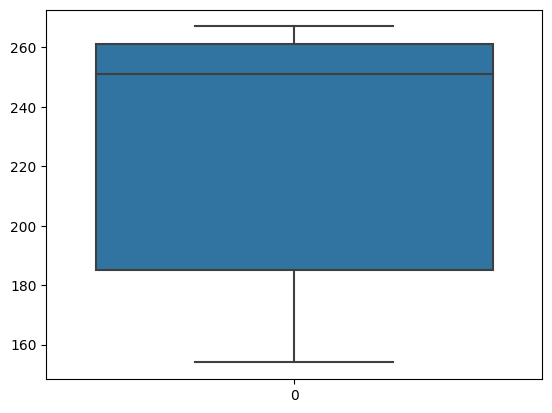

In [77]:
sns.boxplot(df['enrollment_count'])

There are no outliers in the enrollment_count column

<AxesSubplot: >

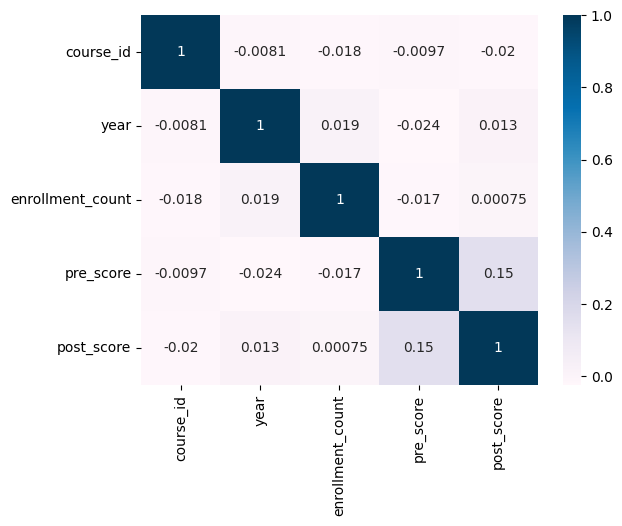

In [78]:
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap=plt.cm.PuBu)

## Task 2
### *Distribution of Enrollment Counts*

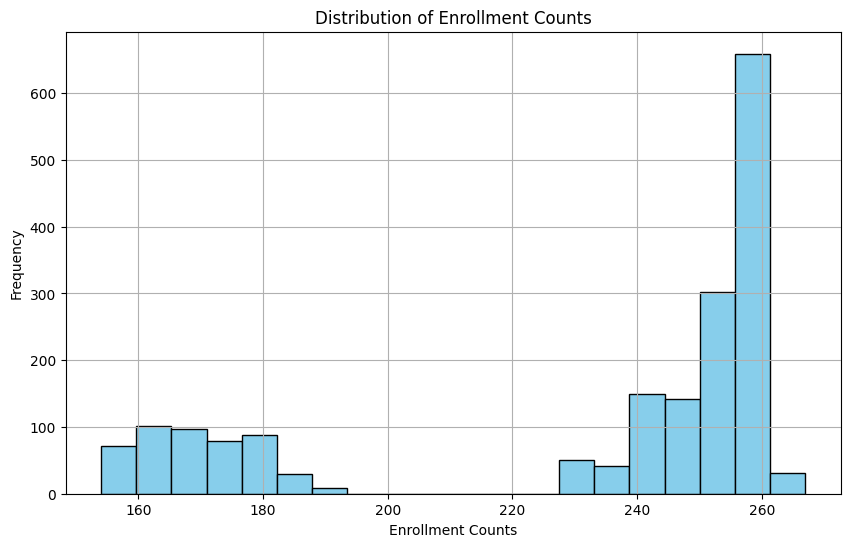

In [79]:
enrollment_counts = df['enrollment_count']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(enrollment_counts, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Enrollment Counts')
plt.xlabel('Enrollment Counts')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Around 255 to 260 people enrol mostly for the courses

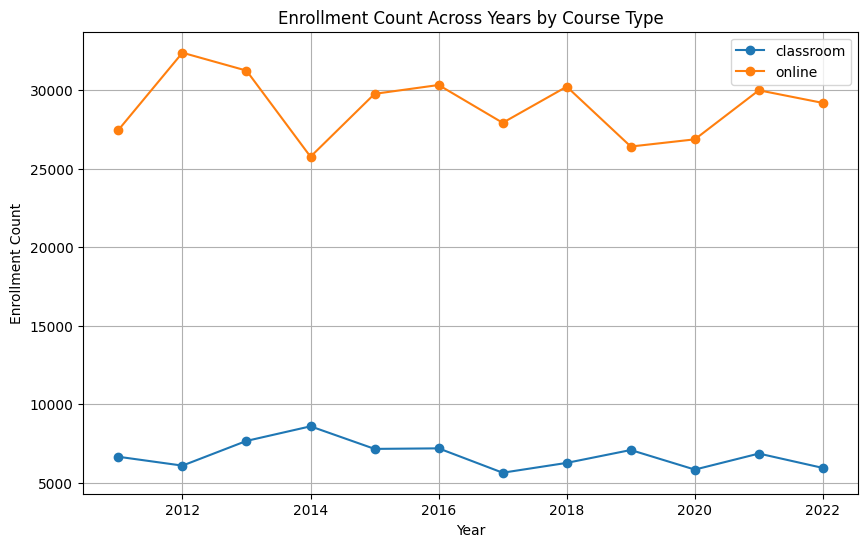

In [80]:
# Group the data by course_type and year, and sum the enrollment counts
course_type_year_grouped = df.groupby(['course_type', 'year'])['enrollment_count'].sum().reset_index()

# Create a line plot for each course type
plt.figure(figsize=(10, 6))
for course_type in course_type_year_grouped['course_type'].unique():
    course_type_data = course_type_year_grouped[course_type_year_grouped['course_type'] == course_type]
    plt.plot(course_type_data['year'], course_type_data['enrollment_count'], marker='o', label=course_type)

plt.title('Enrollment Count Across Years by Course Type')
plt.xlabel('Year')
plt.ylabel('Enrollment Count')
plt.legend()
plt.grid(True)
plt.show()

Significant number of eople enrol mostly for online course type across the years. There were more online enrollment in 2012 and least in 2014. As for classroom, 2017 has least enrollment even though the figure seem to be kind of identical, while 2014 is the year that has most classroom enrollment. 

## Task 3
### *Visualization of Course Types*

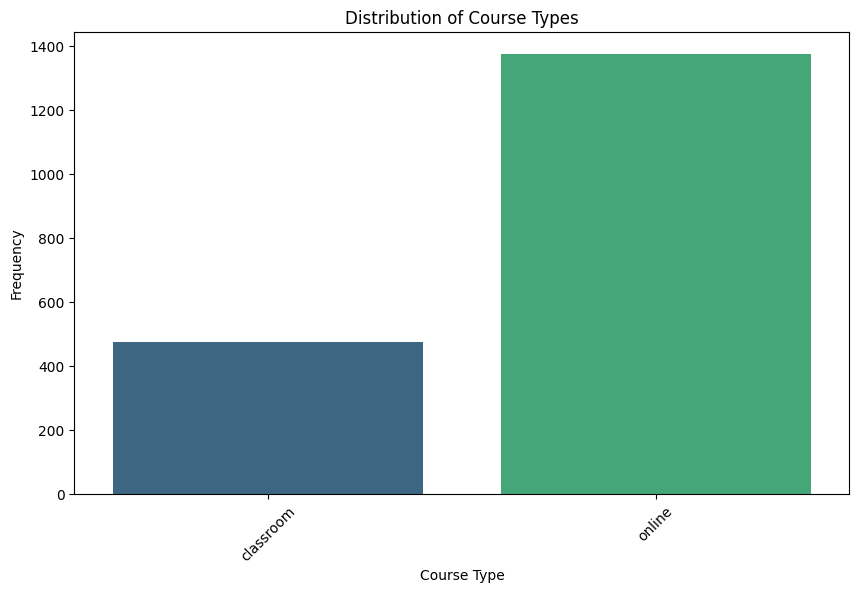

Course type with the highest frequency: online

Balance of observations across different course types:
online       0.743243
classroom    0.256757
Name: course_type, dtype: float64


In [81]:
# Create a count plot for course types
plt.figure(figsize=(10, 6))
sns.countplot(x='course_type', data=df, palette='viridis')

plt.title('Distribution of Course Types')
plt.xlabel('Course Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Identify the type of course with the highest frequency
most_common_course_type = df['course_type'].value_counts().idxmax()
print(f"Course type with the highest frequency: {most_common_course_type}")

# Evaluate the balance of observations across different course types
course_type_counts = df['course_type'].value_counts()
course_type_balance = course_type_counts / course_type_counts.sum()
print("\nBalance of observations across different course types:")
print(course_type_balance)

More than 74% of course enrollment are online. From this, it is clearly identifiable that the observation is significantly imbalance between online enrollment with more than 74%, compared to classroom that has about 26% enrollment.

## Task 4
### *Relationship between Course Type and Enrollment*

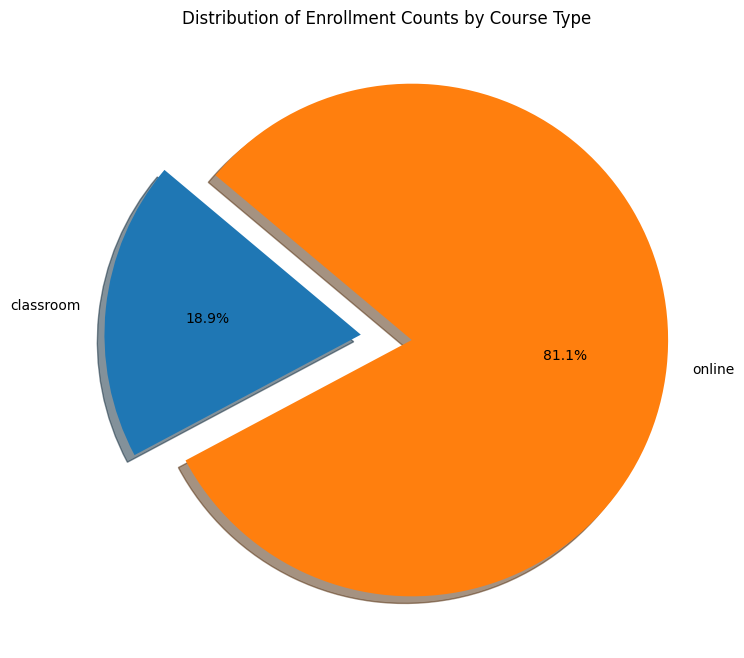

In [82]:
enrollment_by_type = df.groupby('course_type')['enrollment_count'].sum()

# Create a pie plot
plt.figure(figsize=(8, 8))
plt.pie(enrollment_by_type, labels=enrollment_by_type.index, autopct='%1.1f%%', startangle=140, explode=[0.2,.0], shadow=True)
plt.title('Distribution of Enrollment Counts by Course Type')
plt.axis('equal')  
plt.show()

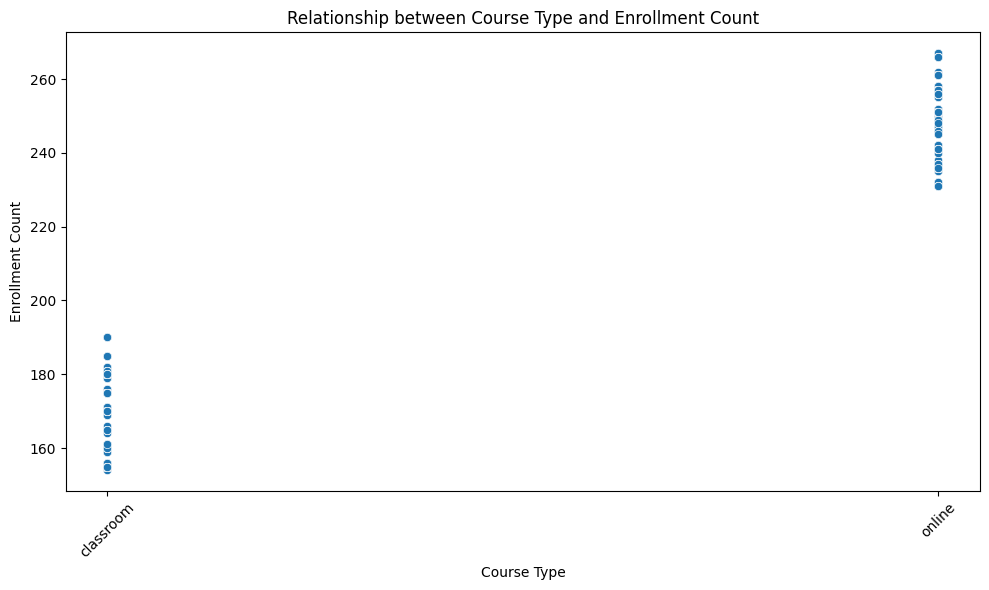

In [83]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='course_type', y='enrollment_count')
plt.xlabel('Course Type')
plt.ylabel('Enrollment Count')
plt.title('Relationship between Course Type and Enrollment Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The least number of people that enrolled for online is more than 220 people which is largely greater than the highest number of people that enrolled for classroom (arounnd 190 people). It is clearly evident that people prefer enrolling for online courses over class courses.

## Task 5
### *Predictive Modeling*

In [84]:
# Convert categorical columns to numerical using label encoding
label_encoder = LabelEncoder()
categorical_cols = ['course_type']

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,0,2018,165,28.14,73.0,Beginner,Science
1,2,0,2020,175,79.68,86.0,None,Science
2,3,1,2016,257,57.24,80.0,None,Mathematics
3,4,1,2013,251,97.67,75.0,Beginner,Technology
4,5,0,2019,165,39.75,76.0,Beginner,Science


The course_type column was encoded into 0, and 1 since it is between two entries (online, classroom).

In [85]:
df = pd.get_dummies(df, columns=['pre_requirement', 'department'], drop_first=True)
df.head()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement_Intermediate,pre_requirement_None,department_Mathematics,department_Science,department_Technology
0,1,0,2018,165,28.14,73.0,0,0,0,1,0
1,2,0,2020,175,79.68,86.0,0,1,0,1,0
2,3,1,2016,257,57.24,80.0,0,1,1,0,0
3,4,1,2013,251,97.67,75.0,0,0,0,0,1
4,5,0,2019,165,39.75,76.0,0,0,0,1,0


The rest of the object columns were then encoded using the one-hot encoding technique. This is done in order to make it possibble for the model to be able to train and perform the task required.

In [86]:
df.head()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement_Intermediate,pre_requirement_None,department_Mathematics,department_Science,department_Technology
0,1,0,2018,165,28.14,73.0,0,0,0,1,0
1,2,0,2020,175,79.68,86.0,0,1,0,1,0
2,3,1,2016,257,57.24,80.0,0,1,1,0,0
3,4,1,2013,251,97.67,75.0,0,0,0,0,1
4,5,0,2019,165,39.75,76.0,0,0,0,1,0


In [87]:

df.columns

Index(['course_id', 'course_type', 'year', 'enrollment_count', 'pre_score',
       'post_score', 'pre_requirement_Intermediate', 'pre_requirement_None',
       'department_Mathematics', 'department_Science',
       'department_Technology'],
      dtype='object')

In [88]:
# defining predictor and target variables
X = df.drop(columns=['course_id', 'enrollment_count'])
y = df['enrollment_count']

The predictor variables X and the target variable y were both created. This is done by dropping the course_id and the enrollment_count (target) columns then assigning y to enrollment_count.

## Task 6
### *Baseline Model for Enrollment Prediction*

In [89]:
# train test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
X_train.head(12)

,course_type,year,pre_score,post_score,pre_requirement_Intermediate,pre_requirement_None,department_Mathematics,department_Science,department_Technology
819,1,2015,22.06,76.0,0,1,0,0,1
244,1,2016,80.64,81.0,0,1,0,0,1
1101,1,2013,90.11,86.0,0,0,1,0,0
1265,1,2014,47.07,63.0,0,1,1,0,0
1244,1,2021,0.00,69.0,0,0,0,0,1
1253,0,2016,48.25,64.0,0,1,1,0,0
575,0,2011,86.13,82.0,0,1,0,1,0
966,0,2013,70.96,73.0,0,1,0,1,0
962,1,2014,57.47,82.0,0,0,0,0,1
834,1,2012,52.84,0.0,0,1,0,0,1


In [91]:
regs = LinearRegression()
lassos = Lasso()
ridges = Ridge()
trees = DecisionTreeRegressor()
rfs = RandomForestRegressor()
elastic_nets = ElasticNet()
svrs = SVR()
gradient_boostings = GradientBoostingRegressor()
neural_networks = MLPRegressor()
bayesian_regressions = GaussianProcessRegressor()
knn_regressions = KNeighborsRegressor()
xgboosts = xgb.XGBRegressor()
huber_regressions = HuberRegressor()
theil_sen_regressions = TheilSenRegressor()

# Add all the models to the `regressors` list
regressors = [
    ('Linear Regression', regs),
    ('Lasso Regression', lassos),
    ('Ridge Regression', ridges),
    ('Decision Tree', trees),
    ('Random Forest', rfs),
    ('ElasticNet', elastic_nets),
    ('SVR', svrs),
    ('Gradient Boosting', gradient_boostings),
    ('Neural Network', neural_networks),
    ('Bayesian Regression', bayesian_regressions),
    ('KNN Regression', knn_regressions),
    ('XGBoost', xgboosts),
    ('Huber Regression', huber_regressions),
    ('Theil-Sen Regression', theil_sen_regressions)
]



# Best hyperparameters: {'depth': 4, 'iterations': 100, 'learning_rate': 0.5}
for clf_name, clf in regressors:    
  
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
  
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    
    score = clf.score(X_test, y_test)
  

    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, score))


Linear Regression : 1.000
Lasso Regression : 0.984
Ridge Regression : 1.000
Decision Tree : 1.000
Random Forest : 1.000
ElasticNet : 0.549
SVR : -0.263
Gradient Boosting : 1.000
Neural Network : 0.498
Bayesian Regression : -28.600
KNN Regression : 0.007
XGBoost : 1.000
Huber Regression : 0.989
Theil-Sen Regression : 0.987


In [92]:
for clf_name, clf in regressors:
    # Fit clf to the training set
    clf.fit(X_train, y_train)

    # Predict y_pred
    y_pred = clf.predict(X_test)

    mse_score = mse(y_test, y_pred)

    # Display MSE score for each model
    print('{:s} - MSE: {:.3f}'.format(clf_name, mse_score))

Linear Regression - MSE: 0.099
Lasso Regression - MSE: 19.937
Ridge Regression - MSE: 0.112
Decision Tree - MSE: 0.205
Random Forest - MSE: 0.122
ElasticNet - MSE: 570.193
SVR - MSE: 1596.504
Gradient Boosting - MSE: 0.359
Neural Network - MSE: 556.900
Bayesian Regression - MSE: 37420.561
KNN Regression - MSE: 1255.504
XGBoost - MSE: 0.133
Huber Regression - MSE: 14.141
Theil-Sen Regression - MSE: 20.880


In [93]:
mse_scores = []

for clf_name, clf in regressors:
    # Fit clf to the training set
    clf.fit(X_train, y_train)

    # Predict y_pred
    y_pred = clf.predict(X_test)

    mse_score = mse(y_test, y_pred)
    
    mse_scores.append({'Model': clf_name, 'MSE Score': mse_score})

# Create a DataFrame for the MSE scores
mse_df = pd.DataFrame(mse_scores)

# Create the bar plot using Plotly Express
fig = px.bar(mse_df, x='Model', y='MSE Score', color='Model',
             title='Mean Squared Error (MSE) Scores for Different Regression Models',
             width=700, height=400)

# Show the plot
fig.show()

In [94]:
for clf_name, clf in regressors:
    # Fit clf to the training set
    clf.fit(X_train, y_train)

    # Predict y_pred
    y_pred = clf.predict(X_test)

    mse_score = np.sqrt(mse(y_test, y_pred))

    # Display MSE score for each model
    print('{:s} - RMSE: {:.3f}'.format(clf_name, mse_score))

Linear Regression - RMSE: 0.315
Lasso Regression - RMSE: 4.465
Ridge Regression - RMSE: 0.335
Decision Tree - RMSE: 0.432
Random Forest - RMSE: 0.350
ElasticNet - RMSE: 23.879
SVR - RMSE: 39.956
Gradient Boosting - RMSE: 0.599
Neural Network - RMSE: 26.157
Bayesian Regression - RMSE: 193.444
KNN Regression - RMSE: 35.433
XGBoost - RMSE: 0.365
Huber Regression - RMSE: 3.760
Theil-Sen Regression - RMSE: 4.268


In [95]:
rmse_scores = []

for clf_name, clf in regressors:
    # Fit clf to the training set
    clf.fit(X_train, y_train)

    # Predict y_pred
    y_pred = clf.predict(X_test)

    rmse_score = np.sqrt(mse(y_test, y_pred))
    
    rmse_scores.append({'Model': clf_name, 'RMSE Score': rmse_score})

# Create a DataFrame for the RMSE scores
rmse_df = pd.DataFrame(rmse_scores)

# Create the bar plot using Plotly Express
fig = px.bar(rmse_df, x='Model', y='RMSE Score', color='Model',
             title='Root Mean Squared Error (RMSE) Scores for Different Regression Models',
             width=700, height=400)

# Show the plot
fig.show()

In [96]:
for clf_name, clf in regressors:
    # Fit clf to the training set
    clf.fit(X_train, y_train)

    # Predict y_pred
    y_pred = clf.predict(X_test)

    mae_score = (mae(y_test, y_pred))

    # Display MSE score for each model
    print('{:s} - MAE: {:.3f}'.format(clf_name, mae_score))

Linear Regression - MAE: 0.140
Lasso Regression - MAE: 3.440
Ridge Regression - MAE: 0.177
Decision Tree - MAE: 0.138
Random Forest - MAE: 0.145
ElasticNet - MAE: 20.695
SVR - MAE: 24.420
Gradient Boosting - MAE: 0.326
Neural Network - MAE: 18.612
Bayesian Regression - MAE: 185.980
KNN Regression - MAE: 27.288
XGBoost - MAE: 0.194
Huber Regression - MAE: 2.122
Theil-Sen Regression - MAE: 2.125


In [97]:
mae_scores = []

for clf_name, clf in regressors:
    # Fit clf to the training set
    clf.fit(X_train, y_train)

    # Predict y_pred
    y_pred = clf.predict(X_test)

    mae_score = mae(y_test, y_pred)
    
    mae_scores.append({'Model': clf_name, 'MSE Score': mae_score})

# Create a DataFrame for the MSE scores
mae_df = pd.DataFrame(mae_scores)

# Create the bar plot using Plotly Express
fig = px.bar(mae_df, x='Model', y='MSE Score', color='Model',
             title='Mean Average Error (MAE) Scores for Different Regression Models',
             width=700, height=400)

# Show the plot
fig.show()

In [98]:
from sklearn.metrics import r2_score

for clf_name, clf in regressors:
    # Fit clf to the training set
    clf.fit(X_train, y_train)

    # Predict y_pred
    y_pred = clf.predict(X_test)

    r2_score_value = r2_score(y_test, y_pred)

    # Display R2 score for each model
    print('{:s} - R2 Score: {:.3f}'.format(clf_name, r2_score_value))

Linear Regression - R2 Score: 1.000
Lasso Regression - R2 Score: 0.984
Ridge Regression - R2 Score: 1.000
Decision Tree - R2 Score: 1.000
Random Forest - R2 Score: 1.000
ElasticNet - R2 Score: 0.549
SVR - R2 Score: -0.263
Gradient Boosting - R2 Score: 1.000
Neural Network - R2 Score: 0.528
Bayesian Regression - R2 Score: -28.600
KNN Regression - R2 Score: 0.007
XGBoost - R2 Score: 1.000
Huber Regression - R2 Score: 0.989
Theil-Sen Regression - R2 Score: 0.986


In [99]:
r2_scores = []

for clf_name, clf in regressors:
    # Fit clf to the training set
    clf.fit(X_train, y_train)

    # Predict y_pred
    y_pred = clf.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    
    r2_scores.append({'Model': clf_name, 'R2 Score': r2})

# Create a DataFrame for the R2 scores
r2_df = pd.DataFrame(r2_scores)

# Create the bar plot using Plotly Express
fig = px.bar(r2_df, x='Model', y='R2 Score', color='Model',
             title='R-squared (R2) Scores for Different Regression Models',
             width=700, height=400)

# Show the plot
fig.show()

In [100]:
num_values_to_print = 5

for clf_name, clf in regressors:
    # Fit clf to the training set
    clf.fit(X_train, y_train)

    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Print actual and predicted values for each model
    print(f'{clf_name} - Actual: {y_test[:num_values_to_print]}, Predicted: {y_pred[:num_values_to_print]}')

Linear Regression - Actual: 233     241
1566    180
486     251
799     261
1233    256
Name: enrollment_count, dtype: int64, Predicted: [240.97459333 180.06724936 250.96698407 260.96869137 256.06810636]
Lasso Regression - Actual: 233     241
1566    180
486     251
799     261
1233    256
Name: enrollment_count, dtype: int64, Predicted: [244.72078365 175.26425032 248.67818299 257.06201353 247.46262318]
Ridge Regression - Actual: 233     241
1566    180
486     251
799     261
1233    256
Name: enrollment_count, dtype: int64, Predicted: [240.94626294 180.03625548 250.93278337 260.93946668 255.69632561]
Decision Tree - Actual: 233     241
1566    180
486     251
799     261
1233    256
Name: enrollment_count, dtype: int64, Predicted: [241. 180. 251. 261. 256.]
Random Forest - Actual: 233     241
1566    180
486     251
799     261
1233    256
Name: enrollment_count, dtype: int64, Predicted: [241. 180. 251. 261. 256.]
ElasticNet - Actual: 233     241
1566    180
486     251
799     261
1

In [101]:
dfs = []

for clf_name, clf in regressors:
    # Fit clf to the training set
    clf.fit(X_train, y_train)

    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Create DataFrame for each model
    model_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    model_df['Model'] = clf_name  
    
    dfs.append(model_df)

# Concatenate all DataFrames into a single DataFrame
comparison_df = pd.concat(dfs, ignore_index=True)

# Display the DataFrame
print(comparison_df.sample(20))

      Actual   Predicted                 Model
2235     232  250.899633                   SVR
5076     251  250.215176  Theil-Sen Regression
51       261  261.030141     Linear Regression
125      165  165.068184     Linear Regression
2483     175  250.899559                   SVR
2393     261  250.900504                   SVR
1019     241  240.938119      Ridge Regression
3888     261  252.000000        KNN Regression
289      246  246.161853     Linear Regression
1677     251  251.000000         Random Forest
2611     251  251.117589     Gradient Boosting
776      261  260.975708      Ridge Regression
4822     241  240.327923  Theil-Sen Regression
417      251  248.685441      Lasso Regression
1383     256  256.000000         Decision Tree
959      261  260.997856      Ridge Regression
3916     165  233.600000        KNN Regression
1693     241  241.110000         Random Forest
2903     251  251.117589     Gradient Boosting
5024     256  256.393228  Theil-Sen Regression


In [102]:
model_names = []
cv_scores = []

# Perform cross-validation for each model
for clf_name, clf in regressors:
    # Calculate cross-validation scores using 5-fold cross-validation
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    
    # Convert negative MSE scores to positive RMSE scores
    rmse_scores = np.sqrt(-scores)
    
    # Calculate the mean RMSE score and store it
    mean_rmse = np.mean(rmse_scores)
    
    # Append model name and cross-validation score to respective lists
    model_names.append(clf_name)
    cv_scores.append(mean_rmse)

# Create a DataFrame to store model names and cross-validation scores
cv_results = pd.DataFrame({'Model': model_names, 'Cross-Validation RMSE': cv_scores})

# Display the cross-validation results
print(cv_results)

                   Model  Cross-Validation RMSE
0      Linear Regression               0.328879
1       Lasso Regression               4.500847
2       Ridge Regression               0.381293
3          Decision Tree               0.501945
4          Random Forest               0.380987
5             ElasticNet              24.784805
6                    SVR              42.099275
7      Gradient Boosting               0.600848
8         Neural Network              29.747490
9    Bayesian Regression             195.619108
10        KNN Regression              37.839340
11               XGBoost               0.396033
12      Huber Regression               6.143978
13  Theil-Sen Regression               4.141870


## Task 8
## Comparison Model for Enrollment Prediction, Model Selection Rationale, Model Performance Comparison and Model Performance Analysis


*Metrics Explanation:*
- *Coefficient of Determination (R2):* R2 measures the proportion of variance in the target variable (enrollment count) that is explained by the linear relationship with the features. An R2 score of 1 indicates that the model perfectly predicts the target variable based on the features.

- *Root Mean Squared Error (RMSE):* RMSE represents the average magnitude of the errors between predicted and actual values. A smaller RMSE value indicates that the model's predictions are closer to the actual values.

*Applying Metrics to Linear Regression:*
- *R2 Score Interpretation:* In the case of the Linear Regression model, the R2 score provides insight into how well the linear relationship between the features and the target variable fits the data. A higher R2 score indicates a better fit, meaning that a larger portion of the variance in enrollment count is explained by the linear relationship with the features.

- *RMSE Interpretation:* RMSE quantifies the average magnitude of errors in the model's predictions. A lower RMSE indicates that the model's predictions are closer to the actual enrollment counts, suggesting that the model's fit is better and its predictions are more accurate.


*Conclusion:*
The chosen Linear Regression model aims to predict enrollment count based on linear relationships between features and the target variable. The metrics R2 and RMSE provide valuable insights into the model's performance. A higher R2 score and a lower RMSE score indicate that the model is effective at capturing the linear patterns in the data and producing accurate enrollment count predictions. However, it's important to note that Linear Regression's effectiveness may be limited when dealing with complex non-linear relationships or data with significant categorical variables.